# Setup

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.visualization import quantity_support
quantity_support()
import matplotlib.pyplot as plt

In [3]:
# That's our own code
import deproject as d

# Do the deprojection

In [4]:
R = np.array([0.1, 0.2, 0.3, .4]) * u.Mpc
G = 1e3 * np.array([0.3, 0.2, 0.1, .05]) * u.Msun / u.pc**2
f = 1e-3 * np.array([0.9, 0.9, 0.9, 0.9]) / (u.Msun / u.pc**2)
G_covariance = np.diag((G * 0.1) ** 2)  # 10% measurement error

result = d.calculate_M_and_covariance_in_bins(
    R=R,
    G=G,
    G_covariance=G_covariance,
    f=f,
    extrapolate=d.jl.ExtrapolatePowerDecay(1),
    interpolate=d.jl.InterpolateR(1),
)

# Correlation matrix
M_stat_corr = result.M_stat_cov / np.outer(result.M_stat_err, result.M_stat_err)

# Plot results

<ErrorbarContainer object of 3 artists>

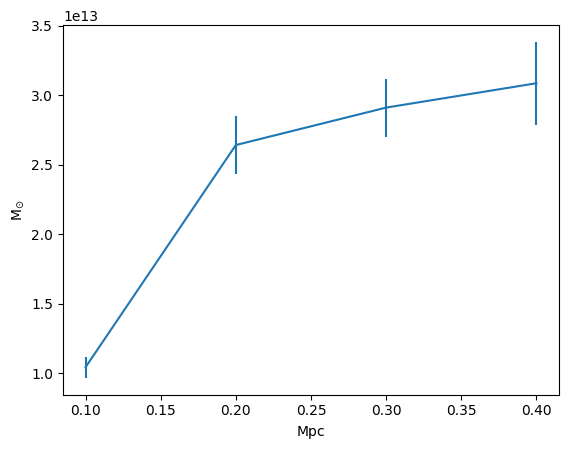

In [5]:
plt.errorbar(R, result.M, yerr=result.M_stat_err)

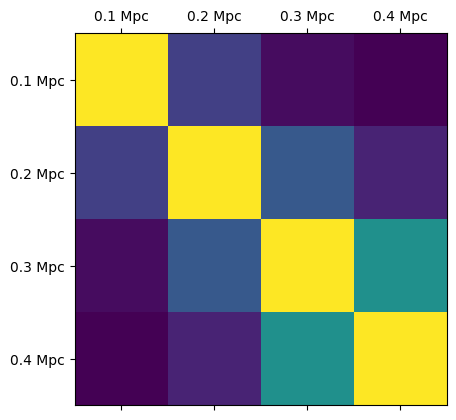

In [6]:
plt.matshow(M_stat_corr)
plt.gca().set_xticks(range(R.shape[0]), labels=R)
plt.gca().set_yticks(range(R.shape[0]), labels=R)
plt.show()

In [7]:
M_stat_corr.value

array([[ 1.        ,  0.10675679, -0.06505806, -0.10218082],
       [ 0.10675679,  1.        ,  0.20565574,  0.00601397],
       [-0.06505806,  0.20565574,  1.        ,  0.45015778],
       [-0.10218082,  0.00601397,  0.45015778,  1.        ]])